# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 4: CNN 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
# Uncomment the line below to help debug if the path to included images don't show
#print(working_dir)
os.chdir(working_dir)

In [3]:
import scipy
import warnings
warnings. filterwarnings("ignore")

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- If you submit individually but you have worked with someone, please include the name of your **one** partner below.
- Please restart the kernel and run the entire notebook again before you submit. (Exception - you may skip the cells where you train neural networks, running the cells which load previously saved weights instead. However, **don't delete/overwrite the output that model.fit produced during training!**)

**Names of person you have worked with goes here:**
<br><BR>

<hr style="height:2pt">

In [4]:
# !pip install imageio
# !pip install pillow
# !conda install tensorflow-datasets
# !pip install tf-keras-vis
# !pip install tensorflow-addons

In [5]:
import numpy as np

from PIL import Image

from matplotlib import pyplot
import matplotlib.pylab as plt 
from scipy.signal import convolve2d
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

## Additional Packages required if you don't already have them
# While in your conda environment,

# imageio
#       Install using "conda install imageio"
# pillow
#       Install using "conda install pillow"
# tensorflow-datasets
#       Install using "conda install tensorflow-datasets"
# tf-keras-vis
#       Install using "pip install tf-keras-vis"
# tensorflow-addons
#       Install using "pip install tensorflow-addons"

<div class="theme"> Overview </div> 


In this homework, we will explore Convolutional Neural Networks (CNNs).  We'll explore the mechanics of convolutional operations and how filters can extract certain features of images, increasing in abstraction with depth. Then we will build a CNN to classify CIFAR-10 images, a standard pedagogical problem, and use saliency maps to understand what the network is paying attention to. Finally, we will see that CNNs aren't just for classifying. They can serve as image input processing for a variety of tasks, as we will show by training a network to rotate faces upright.

<div class='exercise'> <b> Question 1: Convolutional Neural Network Mechanics [10pts total] </b></div>


As you know from lecture, in convolutional neural networks, a convolution is a multiplicative operation on a local region of values. Convolutional layers have shown themselves to have been very useful in image classification, as they allows the network to retain local spatial information for feature extraction.


**1.1** Calculate Convolutions. [5pts]




For the following 2D matrix:

$$
\left( \begin{array}{cccc}
2 & 3 & 2 & 4 \\
3 & 1 & 2 & 2 \\
4 & 1 & 0 & 1 \\
7 & 2 & 1 & 3
\end{array} \right)
$$

you will use the following 2x2 filter to perform a 2D convolution operation.

$$
\left( \begin{array}{cc}
2 & 1 \\
1 & 3 
\end{array} \right)
$$

Compute this operation by hand assuming a vertical and horizontal stride of 1 as well as a) valid, b) same, and c) full padding modes. 

**You may answer question 1.1 in this markdown cell by replacing the '?' marks with the correct value.**



A) Valid

$$
\left( \begin{array}{cccc}
? & ? & ?  \\
? & ? & ?  \\
? & ? & ? 
\end{array} \right)
$$
    
B) Same padding. We will accept solutions for all combinations (top & left, top & right, bottom & left, bottom & right).

$$
\left( \begin{array}{cccc}
? & ? & ? & ? \\
? & ? & ? & ? \\
? & ? & ? & ? \\
? & ? & ? & ?
\end{array} \right)
$$

C) full padding

$$
\left( \begin{array}{cccc}
? & ? & ? & ? & ? \\
? & ? & ? & ? & ? \\
? & ? & ? & ? & ? \\
? & ? & ? & ? & ? \\
? & ? & ? & ? & ?
\end{array} \right)
$$

**1.2** Understanding Pooling Operations. [5pts]

Pooling operations are often used in convolutional neural networks to reduce the dimensionality of the feature maps as well as overall network complexity. Two main types of pooling are used: AveragePooling and MaxPooling.

Using the matrix below, write the output of the AveragePooling and MaxPooling operations with pool size 2x2 and stride  2x2. Repeat with a stride of 1x1.

$$
\left( \begin{array}{cccc}
1 & 2 & 2 & 4 \\
3 & 1 & 2 & 1 \\
4 & 1 & 0 & 2 \\
5 & 2 & 2 & 1
\end{array} \right)
$$

**You may answer question 1.2 in this markdown cell by replacing the '?' marks with the correct value.**

**A) size 2x2 and stride 2x2**

MaxPooling:
$$
\left( \begin{array}{cccc}
 ? &  ? \\
? & ? 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
? & ? \\
? & ?
\end{array} \right)
$$

**B) size 2x2 and stride 1x1**

MaxPooling:
$$
\left( \begin{array}{cccc}
? & ? & ? \\
? & ? & ? \\
? & ? & ? 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
? & ? & ? \\
? & ? & ? \\
? & ? & ?
\end{array} \right)
$$

## Answers

**1.1** Calculate Convolutions. [5pts]




For the following 2D matrix:

$$
\left( \begin{array}{cccc}
2 & 3 & 2 & 4 \\
3 & 1 & 2 & 2 \\
4 & 1 & 0 & 1 \\
7 & 2 & 1 & 3
\end{array} \right)
$$

you will use the following 2x2 filter to perform a 2D convolution operation.

$$
\left( \begin{array}{cc}
2 & 1 \\
1 & 3
\end{array} \right)
$$

Compute this operation by hand assuming a vertical and horizontal stride of 1 as well as a) valid, b) same, and c) full padding modes.

**You may answer question 1.1 in this markdown cell by replacing the '?' marks with the correct value.**



A) Valid

$$
\left( \begin{array}{cccc}
14 & 16 & 16  \\
16 & 6 & 10  \\
24 & 7 & 8 
\end{array} \right)
$$
    
B) Same padding. We will accept solutions for all combinations (top & left, top & right, bottom & left, bottom & right).

$$
\left( \begin{array}{cccc}
14 & 16 & 16 &14 \\
16 & 6 & 10 &7 \\
24 & 7 & 8 & 9 \\
23 & 7 & 6 & 9
\end{array} \right)
$$

C) full padding

$$
\left( \begin{array}{cccc}
4&8&7&10&4 \\
8&14 & 16 & 16 &14 \\
11&16 & 6 & 10 &7 \\
18&24 & 7 & 8 & 9 \\
7&23 & 7 & 6 & 9
\end{array} \right)
$$

**1.2** Understanding Pooling Operations. [5pts]

Pooling operations are often used in convolutional neural networks to reduce the dimensionality of the feature maps as well as overall network complexity. Two main types of pooling are used: AveragePooling and MaxPooling.

Using the matrix below, write the output of the AveragePooling and MaxPooling operations with pool size 2x2 and stride  2x2. Repeat with a stride of 1x1.

$$
\left( \begin{array}{cccc}
1 & 2 & 2 & 4 \\
3 & 1 & 2 & 1 \\
4 & 1 & 0 & 2 \\
5 & 2 & 2 & 1
\end{array} \right)
$$

**You may answer question 1.2 in this markdown cell by replacing the '?' marks with the correct value.**

**A) size 2x2 and stride 2x2**

MaxPooling:
$$
\left( \begin{array}{cccc}
3 &  4 \\
5& 2 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
\frac{7}{4} & \frac{9}{4} \\
3 & \frac{5}{4}
\end{array} \right)
$$

**B) size 2x2 and stride 1x1**

MaxPooling:
$$
\left( \begin{array}{cccc}
3 & 2 & 4 \\
4 & 2 & 2 \\
5 & 2 & 2 
\end{array} \right)
$$
AveragePooling:
$$
\left( \begin{array}{cccc}
\frac{7}{4} & \frac{7}{4} & \frac{9}{4} \\
\frac{7}{4} & 1 & \frac{5}{4} \\
3 & \frac{5}{4} & \frac{5}{4}
\end{array} \right)
$$

<div class='exercise'> <b> Question 2: CNNs at Work [30pts total]  </b></div>

Consider the following image of Widener Library:

![Widener Library](data/Widener_Library.jpg)

**2.1** [2pts] Load the image as a 2D Numpy array into the variable `library_image_data`. Normalize the image data so that values within `library_image_data` fall within [0., 1.]. The image is located at 'data/Widener_Library.jpg'.

**2.2** Filters for image processing. [5pts] Perform sharpening and normalized box blurring using 3x3 convolution kernels (see https://en.wikipedia.org/wiki/Kernel_(image_processing) for example), and apply each of these kernels to the image (separately on each color channel) with same padding mode (you may want to implement your own convolution function or try using  [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)). Show the resulting 3-channel color images, using `np.clip()` to clip values to the range [0., 1.] for use with `imshow`.

**2.3** What a CNN sees. [5pts] Normalize `library_image_data` to the range [-0.5, 0.5], saving the resulting array to `norm_img`. Consider the following 3x3x3 kernel $A_{ijk}$ where
$$
A_{:,:,1} = A_{:,:,2} = A_{:,:,3} = \frac{1}{3} \left( \begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{array} \right),
$$
i.e. it has the same 3x3 depth slice throughout its depth (3 channels for the RGB channels of the input image). Apply $A_{ijk}$ to `norm_img` like a CNN would, using same padding mode (hint: what should the resulting shape of the feature map be?).

After the convolution part, CNNs next need an activation function. We now *rectify* the feature map by applying the ReLU activation function:

`
if x < 0:
    x = 0
else:
    x = x
`

or equivalently, $\textrm{ReLU}(x) = \textrm{max}(0,x)$ as it is often written. You can use `np.clip(x, a_min=0., a_max=None)` as a rectifier. Plot the rectified feature map using `imshow`, using the option `cmap='gray'` to produce a nice black & white image. What is this kernel doing?


**2.4** [5pts] Look up or come up with a 3x3x3 kernel for performing vertical edge detection, and another for performing horizontal edge detection. Apply the vertical edge kernel to `norm_img`, and then through a ReLU, saving the result as `vedges`. Apply the horizontal edge kernel to `norm_img`, pass it through a ReLU and save the result as `hedges`. Plot `vedges` and `hedges` with `imshow` in black & white. Don't worry too much about what kernels you end up using, or what overall normalization factor you use. As long as in the plot vertical(horizontal) edges are clearly emphasized while horizontal(vertical) edges are suppressed, you've done it correctly.

Together, `vedges` and `hedges` could be the output of the first layer of a CNN. Now we will investigate what can happen when we stack CNNs.

**2.5** [8pts] Concatenate `vedges` and `hedges` in a third dimension, calling the output `feature_map`. `feature_map` should have dimensions (267, 400, 2). Take the following 3x3x2 kernel $B_{ijk}$:

$$
B_{:,:,1} = B_{:,:,2} =  \left( \begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array} \right),
$$
and apply it to `feature_map`. This time, before we pass it through the activation, we will add a bias. For now, start with a bias of `bias = -2`, and pass the the result through a ReLU, saving the output in variable `outmap`. Plot `outmap` in black & white. Depending on the normalization of your vertical/horizontal kernels, you will have to play with the `bias` until most of the image is black, except for some shapes that should pop out (you'll still have dots of white in other places). Now that the image has passed through 2 CNN layers, what feature(s) does this latest layer seem to be picking out? (Open-ended question, but there are wrong answers. Think about what $B_{ijk}$ is doing, in combination with the bias and rectifier)

**2.6** [5pts] Take a moment to think about the results of question 2.5. What seems to be the purpose of adding more CNN layers to increase the depth of a network? Why might it be useful to have multiple kernels/filters in a layer? Answer in 3-4 sentences.


## Answers

**2.1** [2pts] Load the image as a 2D Numpy array into the variable `library_image_data`. Normalize the image data so that values within `library_image_data` fall within [0., 1.]. The image is located at 'data/Widener_Library.jpg'.


In [101]:
# your code here 
# library_image_data=plt.imread('data/a.png')
library_image_data=plt.imread('Widener_Library.jpg')
height, width, channels = library_image_data.shape
print(f'PHOTO: height = {height}, width = {width}, number of channels = {channels}, \
image datatype = {library_image_data.dtype}')

PHOTO: height = 267, width = 400, number of channels = 3, image datatype = uint8


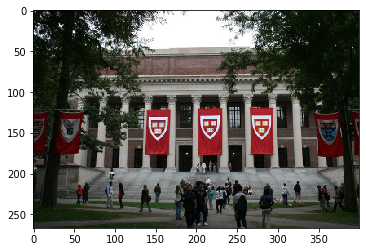

In [102]:
plt.imshow(library_image_data)

In [103]:
library_image_data=library_image_data.astype('float32') / 255

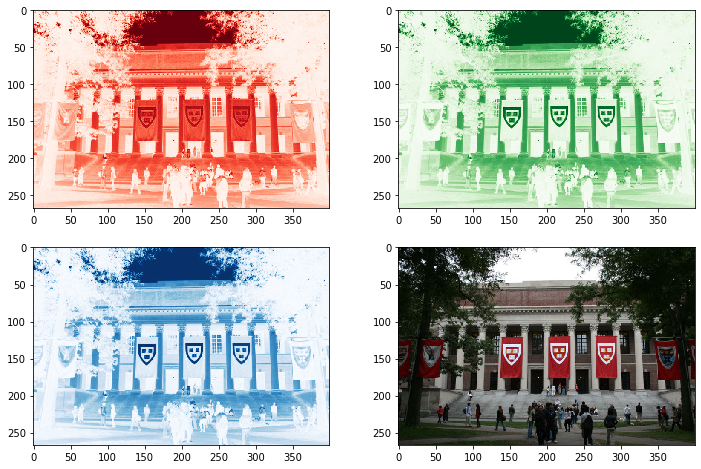

In [104]:
colors = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Greys]
subplots = np.arange(221,224)
plt.figure(figsize=(12,8))
for i in range(3):
    plt.subplot(subplots[i])
    plt.imshow(library_image_data[:,:,i], cmap=colors[i])
plt.subplot(224)
plt.imshow(library_image_data) 
plt.show()

**2.2** Filters for image processing. [5pts] Peform sharpening and normalized box blurring using 3x3 convolution kernels (see https://en.wikipedia.org/wiki/Kernel_(image_processing) for example), and apply each of these kernels to the image (separately on each color channel) with same padding mode (you may want to implement your own convolution function or try using  [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)). Show the resulting 3-channel color images, using `np.clip()` to clip values to the range [0., 1.] for use with `imshow`.


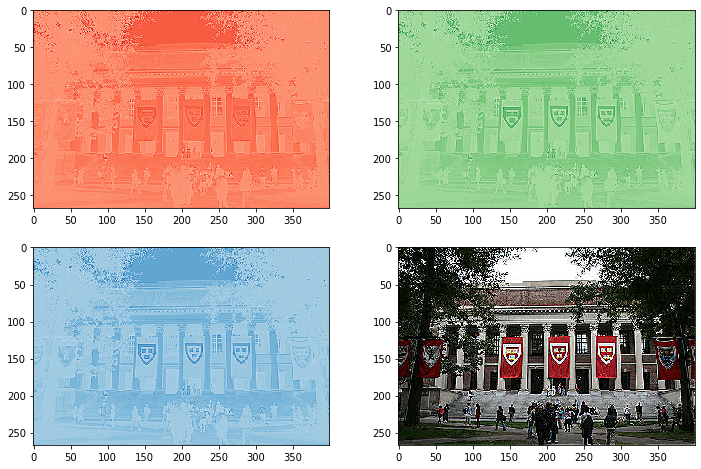

In [105]:
im_sharpen = list()
kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
colors = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Greys]
subplots = np.arange(221,224)
plt.figure(figsize=(12,8))
for i in range(3):
    im_sharpen.append(scipy.signal.convolve2d(library_image_data[:,:,i],kernel_sharpen, mode='same'))
    plt.subplot(subplots[i])
    plt.imshow(im_sharpen[i], cmap=colors[i])
plt.subplot(224)
full_img = np.zeros((im_sharpen[0].shape[0],im_sharpen[0].shape[1],3))
for i in range(3):
    full_img[:,:,i]=im_sharpen[i]
plt.imshow(full_img) 
plt.show()

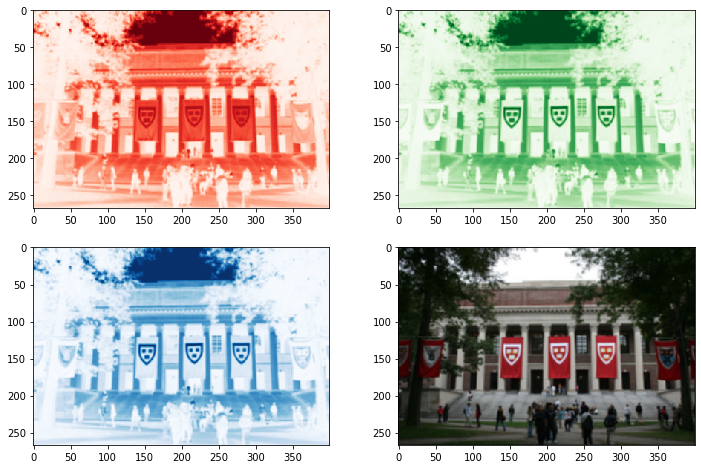

In [106]:
im_blur = list()
kernel_blurring = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
colors = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Greys]
subplots = np.arange(221,224)
plt.figure(figsize=(12,8))
for i in range(3):
    im_blur.append(scipy.signal.convolve2d(library_image_data[:,:,i],kernel_blurring, mode='same'))
    plt.subplot(subplots[i])
    plt.imshow(im_blur[i], cmap=colors[i])
plt.subplot(224)
full_img = np.zeros((im_blur[0].shape[0],im_blur[0].shape[1],3))
for i in range(3):
    full_img[:,:,i]=im_blur[i]
plt.imshow(full_img) 
plt.show()

**2.3** What a CNN sees. [5pts] Normalize `library_image_data` to the range [-0.5, 0.5], saving the resulting array to `norm_img`. Consider the following 3x3x3 kernel $A_{ijk}$ where
$$
A_{:,:,1} = A_{:,:,2} = A_{:,:,3} = \frac{1}{3} \left( \begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{array} \right),
$$
i.e. it has the same 3x3 depth slice throughout its depth (3 channels for the RGB channels of the input image). Apply $A_{ijk}$ to `norm_img` like a CNN would, using same padding mode (hint: what should the resulting shape of the feature map be?).

After the convolution part, CNNs next need an activation function. We now *rectify* the feature map by applying the ReLU activation function:

`
if x < 0:
x = 0
else:
x = x
`

or equivalently, $\textrm{ReLU}(x) = \textrm{max}(0,x)$ as it is often written. You can use `np.clip(x, a_min=0., a_max=None)` as a rectifier. Plot the rectified feature map using `imshow`, using the option `cmap='gray'` to produce a nice black & white image. What is this kernel doing?



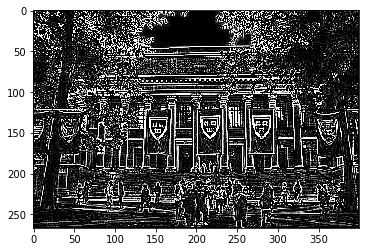

In [107]:
# your code here
norm_img = library_image_data-0.5
kernel_edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])/3
full_img = np.zeros(norm_img.shape[:-1])
for i in range(3):
    full_img+=scipy.signal.convolve2d(norm_img[:,:,i],kernel_edge, mode='same')
np.clip(full_img, a_min=0., a_max=None)
plt.imshow(full_img,cmap='gray',vmin=-0.0,vmax = 0.5) 

*Your answer here*

**2.4** [5pts] Look up or come up with a 3x3x3 kernel for performing vertical edge detection, and another for performing horizontal edge detection. Apply the vertical edge kernel to `norm_img`, and then through a ReLU, saving the result as `vedges`. Apply the horizontal edge kernel to `norm_img`, pass it through a ReLU and save the result as `hedges`. Plot `vedges` and `hedges` with `imshow` in black & white. Don't worry too much about what kernels you end up using, or what overall normalization factor you use. As long as in the plot vertical(horizontal) edges are clearly emphasized while horizontal(vertical) edges are suppressed, you've done it correctly.

Together, `vedges` and `hedges` could be the output of the first layer of a CNN. Now we will investigate what can happen when we stack CNNs.


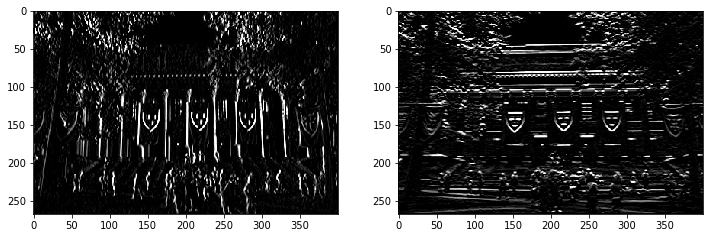

In [108]:
# your code here
plt.figure(figsize=(12,6))
vedges = np.zeros(norm_img.shape[:-1])
kernel_vedge = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
for i in range(3):
    vedges +=  scipy.signal.convolve2d(norm_img[:,:,i],kernel_vedge, mode='same')
np.clip(full_img, a_min=0., a_max=None)
plt.subplot(121)
plt.imshow(vedges,cmap='gray',vmin=0,vmax = 3) 

hedges = np.zeros(norm_img.shape[:-1])
kernel_hedge = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
for i in range(3):
    hedges += scipy.signal.convolve2d(norm_img[:,:,i],kernel_hedge, mode='same')
np.clip(full_img, a_min=0., a_max=None)
plt.subplot(122)
plt.imshow(hedges,cmap='gray',vmin=0,vmax = 3) 

**2.5** [8pts] Concatenate `vedges` and `hedges` in a third dimension, calling the output `feature_map`. `feature_map` should have dimensions (267, 400, 2). Take the following 3x3x2 kernel $B_{ijk}$:

$$
B_{:,:,1} = B_{:,:,2} =  \left( \begin{array}{ccc}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array} \right),
$$
and apply it to `feature_map`. This time, before we pass it through the activation, we will add a bias. For now, start with a bias of `bias = -2`, and pass the the result through a ReLU, saving the output in variable `outmap`. Plot `outmap` in black & white. Depending on the normalization of your vertical/horizontal kernels, you will have to play with the `bias` until most of the image is black, except for some shapes that should pop out (you'll still have dots of white in other places). Now that the image has passed through 2 CNN layers, what feature(s) does this latest layer seem to be picking out? (Open-ended question, but there are wrong answers. Think about what $B_{ijk}$ is doing, in combination with the bias and rectifier)


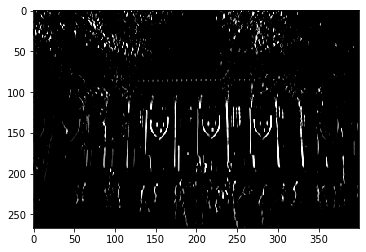

In [109]:
# your code here
feature_map = np.zeros((norm_img.shape[0],norm_img.shape[1],2))
feature_map[:,:,0]=vedges
feature_map[:,:,1]=vedges
B = np.array([[0,0,0],[0,1,0],[0,0,0]])
outmap = np.zeros(norm_img.shape[:-1])
for i in range(2):
    outmap += scipy.signal.convolve2d(feature_map[:,:,i],B, mode='same')
bias = -2
output = np.clip(outmap+bias,a_min = 0,a_max = None)
plt.imshow(output,cmap='gray',vmin=0,vmax= 6) 

Since $B$ is an identity kernel, the outcome is simple the sum of vertical edge detector and the horizontal edge detector. Therefore, it will detect all rectangle-like objects. Then by adding a bias and passing it through a relu, it only identify those very pronounced rectangles such as the windows and pillars, meanwhile clear the noisy background and turn them to black.

**2.6** [5pts] Take a moment to think about the results of question 2.5. What seems to be the purpose of adding more CNN layers to increase the depth of a network? Why might it be useful to have multiple kernels/filters in a layer? Answer in 3-4 sentences.

The kernels in the next layer can combine those in the previous layer to form more complicated detectors, just like combing vertical and horizontal edge detector to get an rectangle detector in the above question. The more features we have, the more powerful the prediction will be. The more filters we have in one layer, not only the features in this level increase, but the possible combinations of these features are also enriched, which can enhance the expressng power of the next layer.

<div class='exercise'> <b> Question 3: Building a Basic CNN Model [30pts total] </b></div>

In this question, you will use Keras to create a convolutional neural network for predicting the type of object shown in images from the [CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification) dataset, which contains 50,000 32x32 training images and 10,000 test images of the same size, with a total of 10 sizes.


<span class='sub-q'> Loading CIFAR-10 and Constructing the Model. </span>

Load CIFAR-10 and use a combination of the following layers: Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order, and you can use as many layers as you'd like) to build your classification model. You may use an existing architecture like AlexNet or VGG16, or create one of your own design. However, you should construct the network yourself and not use a pre-written implementation. At least one of your Conv2D layers should have at least 9 filters to be able to do question 3.3.

Convolutional neural networks are very computationally intensive. We highly recommend that you train your model on a system using GPUs. On CPUs, this training can take over an hour. On GPUs, it can be done within minutes. If you become frustrated having to rerun your model every time you open your notebook, take a look at how to save your model weights as explicitly detailed in **question 4**, where it is required to save your weights.

You can approach the problems in this question by first creating a model assigning 32 filters to each Conv2D layer recreate the model with 64 filters/layer, 128, etc. For each generated model, keep track of the total number of parameters.

**3.1** [6pts] Report the total number of parameters in your model. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases (your model should have at least 2 Conv layers)? You can find this empirically by constructing multiple models with the same type of architecture, increasing the number of filters. Generate a plot showing the relationship and explain why it has this relationship.

**3.2** Choosing a Model, Training and Evaluating It. [7pts total]
 **[5pts]** Take your model from above and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes. **[2pts]** Plot the loss and accuracy (both train and test) for your chosen architecture.

**Techniques to Visualize the Model.**

We will gain an intuition into how our model is processing the inputs in two ways.  First we'll ask you to use feature maps to visualize the activations in the intermediate layers of the network. We've provided a helper function `get_feature_maps` to aid in extracting feature maps from layer outputs in your model network.  Feel free to take advantage of it if you'd like.  We'll also ask you to use [saliency maps](https://arxiv.org/abs/1312.6034) to visualize the pixels that have the largest impact on the classification of an input (image in this case), as well as a more recent development,[Grad-CAM](https://arxiv.org/abs/1610.02391), which has been shown to better indicate the attention of CNNs.

**3.3** [5pts] For a given input image from the test set that is correctly classified, use your model and extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid (use `imshow`'s `cmap='gray'` to show the feature maps in black & white).  Make sure to plot (and clearly label) your original input image as well. You may use the provided `get_feature_maps` function and the `cifar10dict` dictionary to convert class index to the correct class name.

**3.4** [5pts] For the same input image generate and plot a (SmoothGrad) saliency map to show the pixels in the image most pertinent to classification, and a Grad-CAM heatmap. This is most easily done with the [tf-keras-vis](https://pypi.org/project/tf-keras-vis/) package. Take a look at the "Usage" examples; it will be straightforward to apply to our model. Feel free to pick your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html); the `jet` colormap is harder to interpret than sequential ones. Arrange the three plots in a row using subplots: Original Image, Saliency Map, GradCAM. Which visualization is easier to understand in your case, and what does the network seem to be focusing on?

**3.5** [7pts] Repeat `3.4` for an image from the test set that is *incorrectly classified*, indicating both the incorrect label and what the correct label should be, and from the visualizations of network attention, hypothesize why the network arrived at its answer. (Make sure you pass a new loss to the visualizers that uses the *incorrect* class index, because we want to see what caused the network to think the image was in that category!) If you had control over what images go in the training dataset, how could you modify it to avoid this particular network failure?

*Some code that will help you generate feature maps*

In [110]:
def get_feature_maps(model, layer_id, input_image):
    """Returns intermediate output (activation map) from passing an image to the model
    
    Parameters:
        model (tf.keras.Model): Model to examine
        layer_id (int): Which layer's (from zero) output to return
        input_image (ndarray): The input image
    Returns:
        maps (List[ndarray]): Feature map stack output by the specified layer
    """
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))

*A dictionary to turn class index into class labels for CIFAR-10*

In [111]:
cifar10dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

*Some imports for getting the CIFAR-10 dataset and for help with visualization*

In [112]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

## Answers

**3.1** [6pts] Report the total number of parameters in your model. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases (your model should have at least 2 Conv layers)? You can find this empirically by constructing multiple models with the same type of architecture, increasing the number of filters. Generate a plot showing the relationship and explain why it has this relationship.

In [113]:
# your code here
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images.shape

(50000, 32, 32, 3)

In [114]:
# your code here
print(test_images.shape)
train_images.max(), train_images.min()

(10000, 32, 32, 3)


(255, 0)

In [115]:
train_images = train_images.reshape((50000, 32, 32, 3)) # Reshape to get third dimension
test_images = test_images.reshape((10000, 32, 32, 3)) 

train_images = train_images.astype('float32') / 255 # Normalize between 0 and 1
test_images = test_images.astype('float32') / 255 

# Convert labels to categorical data 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 32)               

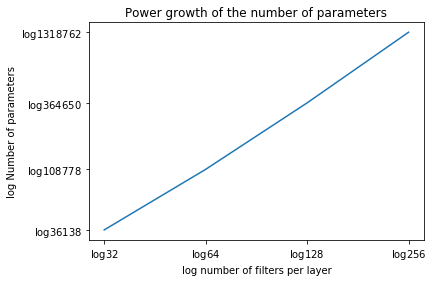

In [116]:
num_filter = [32,64,128,256]
num_params = []
for i in range(4):
    cifar10_cnn_model = Sequential() # Create sequential model
    # Add network layers
    cifar10_cnn_model.add(Conv2D(num_filter[i], (3, 3),name ='Conv1', activation='relu',input_shape=(32, 32, 3)))
    cifar10_cnn_model.add(MaxPooling2D((2, 2)))
    cifar10_cnn_model.add(Conv2D(num_filter[i], (3, 3),name ='Conv2', activation='relu')) 
    cifar10_cnn_model.add(MaxPooling2D((2, 2)))
    cifar10_cnn_model.add(Conv2D(num_filter[i], (3, 3),name ='Conv3', activation='relu'))
    cifar10_cnn_model.add(Flatten())
    cifar10_cnn_model.add(Dense(32, activation='relu'))
    cifar10_cnn_model.add(Dense(10, activation='softmax'))
    cifar10_cnn_model.summary()
    num_params.append(cifar10_cnn_model.count_params())

plt.plot(np.log(num_filter), np.log(num_params))
plt.xticks(np.log(num_filter), ['$\log{32}$', '$\log{64}$', '$\log{128}$','$\log{256}$'])
plt.yticks(np.log(num_params), ['$\log{0}$'.format(num_params[0]),'$\log{0}$'.format(num_params[1]),'$\log{0}$'.format(num_params[2]),'$\log{0}$'.format(num_params[3])])
plt.ylabel("log Number of parameters")
plt.xlabel("log number of filters per layer")
plt.title("Power growth of the number of parameters")
plt.show()

**Response:** I plot the log number of filters per layer versus the log number of parameters. The linear pattern indicates a **power relationship** between these two variables without log. Our architecture is summarized as the table above. The number of output layers of the first Conv2d layer is proportional to the number of filters. Therefore, the number of parameters in the first Conv2d layer is

$$num\_params1 = 3*3*3*num\_filter+num\_filter = 28*num\_filter$$


And the number of parameters of the second Conv2d layer is (Note that the number of output layers after the first Conv2d layer is exactly is number of filters)


$$ num\_params2 = num\_filter*3*3*num\_filter+num\_filter = 9*num\_filter^2 + num\_filter $$


The number of parameters of the third Con2d layer is exactly the same.
Finally, the number of the first dense layer is


$$ num\_params4 = 4*4*num\_filter*32 +32 = 512*num\_filter +32 $$


The number of the second dense layer's parameters is neglectible.
At first, the $num\_params4$ is donimant in determing the total number of parameters, and grows linearly, But as the number of filters grows larger, the $num\_params2$ begin to take the place and the total number grows quadratically. Therefore, the number of parameters will be 2-4 times larger as we double the number of the filters.

$$Num\_Params \approx num\_filter^2$$

*Your answer here*

**3.2** Choosing a Model, Training and Evaluating It. [7pts total]
**[5pts]** Take your model from above and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes. **[2pts]** Plot the loss and accuracy (both train and test) for your chosen architecture.

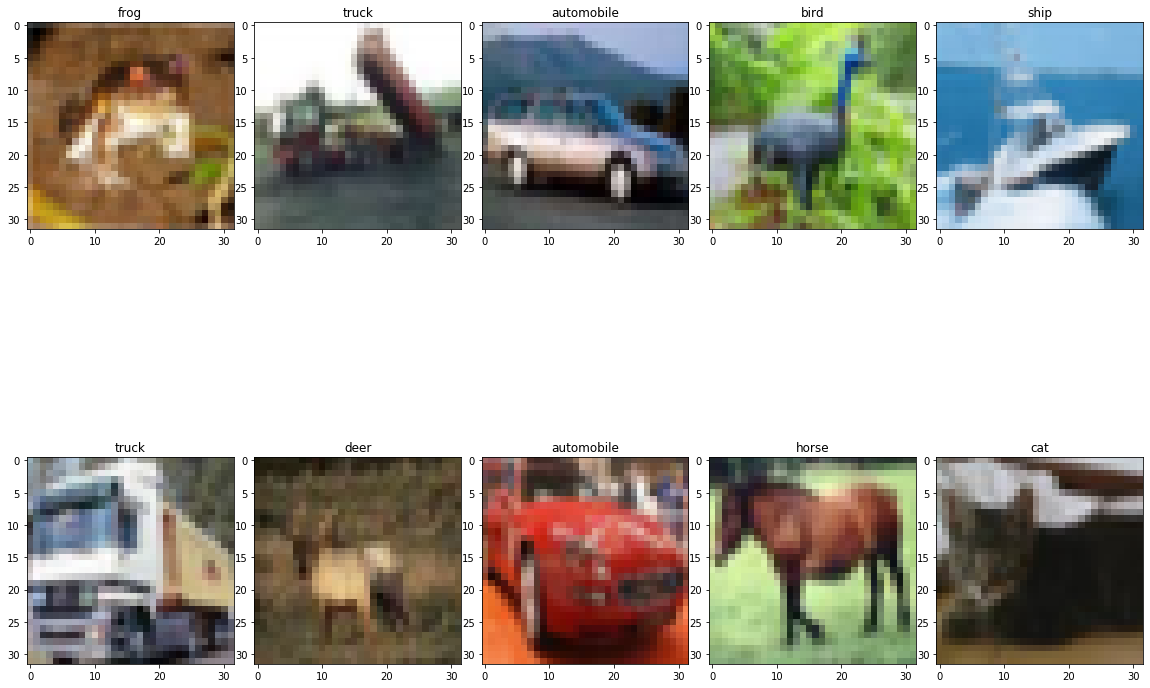

In [117]:
plt.figure(figsize = (20, 16))
grid = plt.GridSpec(2, 5, wspace=0.1, hspace=0)
for i in range(10):
    plt.subplot(grid[i % 2, (int)(i / 2)])
    plt.imshow(train_images[i])
    plt.title(cifar10dict[np.argmax(train_labels[i])])

In [118]:
# your code here 
def create_model(input_shape = (32,32,3), filters = 128):
    cnn_model = Sequential() # Create sequential model
    # Add network layers
    cnn_model.add(Conv2D(filters, (3, 3), activation='relu',input_shape=input_shape))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(filters, (3, 3), activation='relu')) 
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(filters, (3, 3), activation='relu'))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(32, activation='relu'))
    cnn_model.add(Dense(10, activation='softmax'))
    optimizer = Adam(lr=0.001)
    cnn_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return cnn_model
    
cifar10_cnn_model = create_model()
cifar10_cnn_model.summary()
#optimizer = RMSprop(lr=1e-2)

# Compile model


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

In [24]:
# your code here
%time 
checkpoint_path_cifar10 ='train_cifar10/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path_cifar10)
# Save Codes
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_cifar10,
                                                 save_weights_only=True,
                                                 verbose=1)

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 9.3 µs


In [16]:
# Fit the model 
verbose, epochs, batch_size = 1, 15, 64 # try a different num epochs and batch size : 30, 16 


history = cifar10_cnn_model.fit(train_images, train_labels, 
                              epochs = epochs, 
                              batch_size = batch_size, 
                              verbose = verbose,
                              validation_split = 0.2,
                              # validation_data=(X_val, y_val) # IF you have val data
                              shuffle = True,
                              callbacks = [cp_callback])
                            

cifar10_cnn_model.save('cifar10_model.h5')

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
39808/40000 [============================>.] - ETA: 0s - loss: 1.7493 - accuracy: 0.3374
Epoch 00001: saving model to train_cifar10/cp.ckpt
40000/40000 [==============================] - 15s 372us/sample - loss: 1.7483 - accuracy: 0.3380 - val_loss: 1.5430 - val_accuracy: 0.4325
Epoch 2/15
39744/40000 [============================>.] - ETA: 0s - loss: 1.3772 - accuracy: 0.4953
Epoch 00002: saving model to train_cifar10/cp.ckpt
40000/40000 [==============================] - 10s 262us/sample - loss: 1.3762 - accuracy: 0.4957 - val_loss: 1.3197 - val_accuracy: 0.5229
Epoch 3/15
39744/40000 [============================>.] - ETA: 0s - loss: 1.2097 - accuracy: 0.5643
Epoch 00003: saving model to train_cifar10/cp.ckpt
40000/40000 [==============================] - 11s 263us/sample - loss: 1.2089 - accuracy: 0.5645 - val_loss: 1.1737 - val_accuracy: 0.5847
Epoch 4/15
39744/40000 [============================>.] - ETA: 0s - loss: 1.0

In [17]:
cifar10_cnn_model.load_weights('cifar10_model.h5')

In [18]:
! ls {checkpoint_dir}

checkpoint		     cp.ckpt.data-00001-of-00002
cp.ckpt.data-00000-of-00002  cp.ckpt.index


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.7077


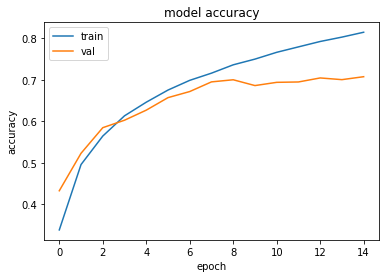

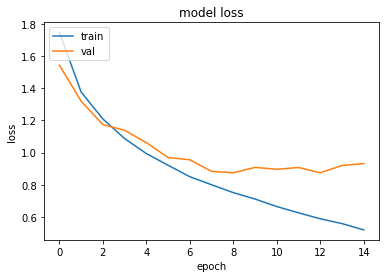

In [19]:
# your code here
print(history.history.keys())
print(history.history['val_accuracy'][-1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#plt.savefig('../images/batch8.png')

In [121]:
model = create_model()

# Evaluate the blank model
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

model.load_weights('cifar10_model.h5')

# Reload the trained weights and evaluate
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 - 8s - loss: 2.3109 - accuracy: 0.0918
Untrained model, accuracy:  9.18%
10000/10000 - 7s - loss: 0.9457 - accuracy: 0.7059
Restored model, accuracy: 70.59%


**3.3** [5pts] For a given input image from the test set that is correctly classified, use your model and extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid (use `imshow`'s `cmap='gray'` to show the feature maps in black & white).  Make sure to plot (and clearly label) your original input image as well. You may use the provided `get_feature_maps` function and the `cifar10dict` dictionary to convert class index to the correct class name.


Text(0.5, 1.0, 'Label: cat')

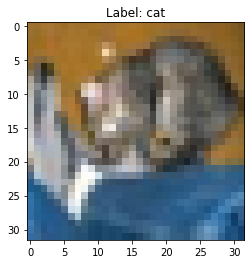

In [122]:
predict = model.predict(test_images[0:50])
labels = np.argmax(predict,1)
for i in range(10):
    if labels[i] == np.argmax(test_labels[i]):
#         print(i,"th picture. ""Prediction: ", predict[i], "\n Predicted Label: ",labels[i],"\n True label: ",test_labels[i])
        img = test_images[i]
        label = labels[i]
        break
plt.imshow(img)
plt.title("Label: {0}".format(cifar10dict[label]))

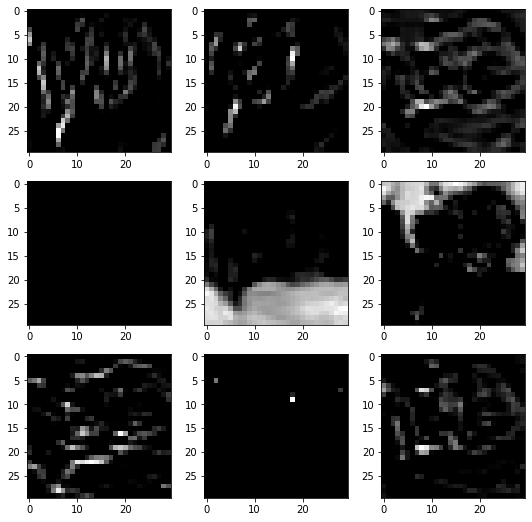

In [123]:
feature_layers = get_feature_maps(model, 0, img)[0:9]
plt.figure(figsize = (9,9))
for i,idx in enumerate(np.arange(331,340)):
    plt.subplot(idx)
    plt.imshow(feature_layers[i],cmap='gray')   

**Response**: The first cat image is predicted correctly. I plot the first 9 feature maps in the first convolution layer. The first and fourth feature map seems to be a horizontal edge detector. The second and third one seems to be a background or certain color detector. The sixth feature map is probably an edge detector. However, other feature maps such as the seventh or eighth doesn't make too much sense.

**3.4** [5pts] For the same input image generate and plot a (SmoothGrad) saliency map to show the pixels in the image most pertinent to classification, and a Grad-CAM heatmap. This is most easily done with the [tf-keras-vis](https://pypi.org/project/tf-keras-vis/) package. Take a look at the "Usage" examples; it will be straightforward to apply to our model. Feel free to pick your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html); the `jet` colormap is harder to interpret than sequential ones. Arrange the three plots in a row using subplots: Original Image, Saliency Map, GradCAM. Which visualization is easier to understand in your case, and what does the network seem to be focusing on?


In [148]:
# your code here 
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

    
# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create Saliency object
def focus_plot(img,true_label, predicted_label ,colormap =cm.Reds,smoothness= 20):
    saliency = Saliency(model, model_modifier)

    # Define loss function. 6 is the index corresponding to ouzel.
    loss = lambda output: K.mean(output[:, predicted_label])

    # Generate saliency map
    saliency_map = saliency(loss,img,smooth_samples=smoothness)
    saliency_map = normalize(saliency_map)
    
    # Create Gradcam object
    gradcam = Gradcam(model, model_modifier)

    # Generate heatmap with GradCAM
    cam = gradcam(loss, img)
    cam = normalize(cam)
    
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
    ax[0].imshow(img)
    ax[0].set_title("Original Picture")
    f.suptitle("Category: {0}, Predicted: {1}".format(cifar10dict[true_label],cifar10dict[predicted_label]))
    ax[1].imshow(saliency_map[0], cmap='gray')
    ax[1].set_title("SmoothGrad")
    heatmap = np.uint8(colormap(cam[0])[..., :3] * 255)
    ax[2].imshow(img,alpha =1)
    ax[2].imshow(heatmap, cmap='gray', alpha=0.5)
    ax[2].set_title("GradCAM")

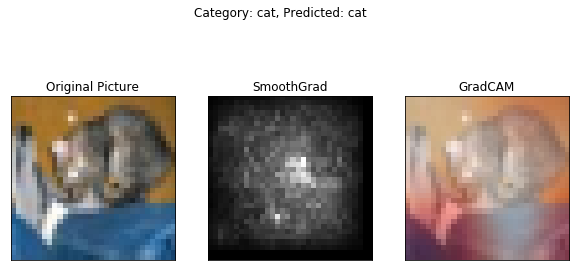

In [149]:
focus_plot(img, label, label, colormap = cm.Reds)

*Your answer here*

GradCAM is easier to recognize. The Saliency  graph SmoothGrad doesn't give clear information as the highlited spots are almost uniformly distributed. However, from GradCAM we know that certain part of the image is more deteministic in prediction. In the case of the cat, the body and the tail of the cat seems to provide more relevant information to the model.

**3.5** [7pts] Repeat `3.4` for an image from the test set that is *incorrectly classified*, indicating both the incorrect label and what the correct label should be, and from the visualizations of network attention, hypothesize why the network arrived at its answer. (Make sure you pass a new loss to the visualizers that uses the *incorrect* class index, because we want to see what caused the network to think the image was in that category!) If you had control over what images go in the training dataset, how could you modify it to avoid this particular network failure?

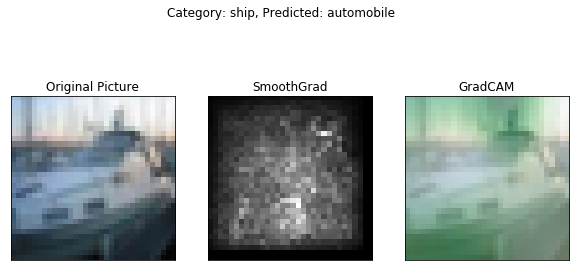

In [30]:
# your code here
for i in range(10):
    if labels[i] != np.argmax(test_labels[i]):
        wrong_img = test_images[i]
        wrong_label = labels[i]
        true_label = np.argmax(test_labels[i])
        break       
focus_plot(wrong_img,true_label,wrong_label,cm.Greens,smoothness =20)

*Your answer here*

**Response**: This picture of a ship is wrongly predicted as a plane. The GradCAM graph provides more information than the Saliency graph. We can see that the loss function is more sensitive to the grean areas, which is centered at the deck compartment and windoes of the ship, which resemble those of a plane in both terms of color and shape. Thus these similar features guide the predictor to wrongly label the ship as a plane. We can learn a lesson from this that we may want to put pictures of one object with varying types, status and background into the training model to help the model recognize their different potential patterns and become more robust in predicting unseen objects.

<div class='exercise'> <b> Question 4: Image Orientation Estimation [30pts] </b></div>

In this problem we will construct a neural network to predict how far a face is from being "upright". Image orientation estimation with convolutional networks was first implemented in 2015 by Fischer, Dosovitskiy, and Brox in a paper titled ["Image Orientation Estimation with Convolutional Networks"](https://lmb.informatik.uni-freiburg.de/Publications/2015/FDB15/image_orientation.pdf), where the authors trained a network to straighten a wide variety of images using the Microsoft COCO dataset. In order to have a reasonable training time for a homework, we will be working on a subset of the problem where we just straighten images of faces. To do this, we will be using the [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset of celebrity faces, where we assume that professional photographers have taken level pictures. The training will be supervised, with a rotated image (up to $\pm 60^\circ$) as an input, and the amount (in degrees) that the image has been rotated as a target. 

The network training for this question can be long (even using a GPU on the JupyterHub, it can take 1-2 hours to reach peak network performance), but deep learning generally requires substantial training times on the order of days or weeks. One aim of this problem is to give you a gentle introduction to some techniques for prototyping such networks before a full training.

<span class='sub-q'>  Loading CelebA and Rotating Images. [5 pts] </span>

**4.1** Loading CelebA and Thinking about Datasets. [2pts] Run the cells provided below to automatically download the CelebA dataset. It is about 1.3GB, which can take 10-20 minutes to download. This happens only once; in the future when you rerun the cell, it will use the dataset stored on your machine. The creation of the normalization/rotation/resize pipeline has been done for you, resulting in train dataset `train_rot_ds` and test dataset `test_rot_ds`. [TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) are objects that behave like Python generators, allowing you to take elements (either input/target tuples or feature dictionaries) until you have gone through the entire dataset. Note how this is different from Question 3 where the entire dataset was loaded in as an array. Datasets also allow you to pipeline transformations to be applied to the elements, resulting in a new transformed Dataset (like `train_rot_ds`). **Question: Aside from pipelining, what is an important practical reason to use Datasets over simply loading all the data in X and Y arrays?**

**4.2** Taking a look. [3pts] In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits (read about formatting floats using Python f-strings if you're unfamiliar). Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

<span class='sub-q'> Building a Model. [11pts total]</span>

**4.3** Conceptual Question. [2pts] Dropout layers have been shown to work well for regularizing deep neural networks, and can be used for very little computational cost. For our network, is it a good idea to use dropout layers? Explain, being sure to explicitly discuss how a dropout layer works, and what that would mean for our model.

**4.4** Compile a Model. [4pts] Construct a model with multiple Conv layers and any other layers you think would help. Be sure to output `<yourmodelname>.summary()` as always. Feel free to experiment with architectures and number of parameters if you wish to get better performance or better training speed. You certainly don't need more than a few million parameters; we were able to it with substantially fewer. Any working setup is acceptable though.

**4.5** Training the Model. [5pts] Train your model using `<yourmodelname>.fit()`. The syntax is a little different when working with Datasets instead of numpy arrays; take a look at the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation. Be sure to also pass the test data as validation data. When passing `train_rot_ds` to `fit()`, you will find it useful to use pipelines to [batch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) the data. You can also experiment with [prefetching](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) batches/elements from the dataset, which may allow you to speed up iterations by a few percent. Finally, while dry-running and prototyping your model, you may find it useful to [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) a subset of the data to speed up experimentation. Your final model should be trained on all the available training data though. You should achieve a validation loss of less than 9, corresponding to $\pm 3^\circ$ accuracy in predicting the rotations on the test set. This can be achieved in just 2-3 epochs, though you are free to train as long as you want.

<span class='sub-q'> Saving a Model. [3pts total]</span>

There are various ways to save a model, to various degrees. You can simply save the weights, you can save just the architecture, or you can save the whole model, including the state of the optimizer. The final way allows you to restart training as if it never stopped. For our purposes, we will only be saving the weights for simplicity. This way tends to be the most robust, and in general you'll usually have fewer problems running your model on other machines, or interfacing with other packages like tf-keras-vis.

**4.6** Conceptual Question.[2pt] Suppose you save just the weights after training for a while. If you were to load the weights again and continue training, would it work? How will it be different than continuing from a full-model save? Answer in a few sentences.

**4.7** Save and load your weights. [1pt] Save your model weights to the path 'model/*somename*' where *somename* is whatever filename prefix you want. Then load weights from the same path.
    
    Note: If you don't intend to use it, you may leave your line of code commented out. Nothing should change if you run it after saving it though, since it will load the same weights and everything else about the model will still be in memory. If you close your notebook or restart your kernel in the future, run all the cells required to compile the model, but skip the cells that performs the fit and the save. After running the load weights cell, your previously trained model will be restored.

<span class='sub-q'> Testing your model. [11pts total]</span>

**4.8** Checking out performance on the Test Set.[5pts] Create a subplots grid with 4 rows and 3 columns. Each row will be a separate image from the test set (of your choice) and each column will consist of: Original Image, Predicted Straightened Image, Target Straightened Image. The title of the latter two should be the predicted rotation and the actual rotation. For example, a row should look something like this:
![straightened face](data/straightened.png)
This can be achieved using the provided function `rot_resize` to correct for the rotation predicted by your network.

**4.9** Visualizing Attention. [5pts] Like in question 3, we will use the saliency map and GradCAM to see what the network was looking at to determine the orientation of a testset image. The code will be very similar to what you used in question 3, but there are two important modifications. In defining the new `model_modifier(m)` function, simply replace the contents with `pass`. This is because your model does not (should not) have a softmax activation on the last layer, so we don't need this function to do anything. The other modification is to change the loss function (that was defined as a Python lambda function) to an MSE, so it should now be `tf.keras.backend.mean((output - label)**2)` where label is the actual rotation of the image. Pick any image from the test set, and like before, make a row of 3 subplots showing the original image, the saliency map, and the GradCAM output. __Question: What types of features does the network appear to use to determine orientation?__

**4.10** Correct an image of your choosing. [1pt] Find an image or image(s) (not from the provided test/training sets), or make your own. You may rotate it yourself up to $\pm60^\circ$, or the face can already be naturally rotated. Resize and crop the image to 140px by 120px, load it here, and normalize it to [0.,1.] (you may use the provided `normalize_image` function) and use your network to correct it. I found that my network was a very effective "un-confuser":
![Confused Chris](data/chrisprattcorrection.png)

## Answers

**4.1** Loading CelebA and Thinking about Datasets. [2pts] Run the cells provided below to automatically download the CelebA dataset. It is about 1.3GB, which can take 10-20 minutes to download. This happens only once; in the future when you rerun the cell, it will use the dataset stored on your machine. The creation of the normalization/rotation/resize pipeline has been done for you, resulting in train dataset `train_rot_ds` and test dataset `test_rot_ds`. [TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) are objects that behave like Python generators, allowing you to take elements (either input/target tuples or feature dictionaries) until you have gone through the entire dataset. Note how this is different from Question 3 where the entire dataset was loaded in as an array. Datasets also allow you to pipeline transformations to be applied to the elements, resulting in a new transformed Dataset (like `train_rot_ds`). **Question: Aside from pipelining, what is an important practical reason to use Datasets over simply loading all the data in X and Y arrays?**


1. shuffle: we can randomly mix the data to remove the correlation using `shuffle` attribute.

2. map: apply a user-defined function to multiple data entries at the same time. The `map` is faster than `for` loop in array data. Also, we can use pipeline for efficient data preprocessing, which has been mentioned.

3. batch : we can easily structure the data in mini-batches for training using `batch` attribute.

4. prefetch:  preprocess data and feed to the GPU only before it asks for more, thus by simultaneously taking advantage of the CPU and GPU. This can help save computational and spacial resources.

In [69]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


# coding=utf-8
# Copyright 2020 The TensorFlow Datasets Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""CelebA dataset.
Large-scale CelebFaces Attributes (CelebA) Dataset
Deep Learning Face Attributes in the Wild
Ziwei Liu and Ping Luo and Xiaogang Wang and Xiaoou Tang
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import tensorflow.compat.v2 as tf

import tensorflow_datasets.public_api as tfds

IMG_ALIGNED_DATA = ("https://drive.google.com/uc?export=download&"
                    "id=1pVZI1-5wu-hdeT49bgT3yb9TK0pa8AWV")
# EVAL_LIST = ("https://drive.google.com/uc?export=download&"
#              "id=0B7EVK8r0v71pY0NSMzRuSXJEVkk")
EVAL_LIST = ("https://drive.google.com/uc?export=download&"
             "id=1jg-5WxLNMMUhpzyoO6kKWz6ekVOZQTxk")


# # Landmark coordinates: left_eye, right_eye etc.
# LANDMARKS_DATA = ("https://drive.google.com/uc?export=download&"
#                   "id=0B7EVK8r0v71pd0FJY3Blby1HUTQ")


LANDMARKS_DATA = ("https://drive.google.com/uc?export=download&"
                  "id=1-dZ2vWh94GAlxFn88yBohlhPukE1v-OX")

# # Attributes in the image (Eyeglasses, Mustache etc).
# ATTR_DATA = ("https://drive.google.com/uc?export=download&"
#              "id=0B7EVK8r0v71pblRyaVFSWGxPY0U")


# Attributes in the image (Eyeglasses, Mustache etc).
ATTR_DATA = ("https://drive.google.com/uc?export=download&"
             "id=1cDioMQhnNWhFkT6DTAUhuIVskk862hIv")


LANDMARK_HEADINGS = ("lefteye_x lefteye_y righteye_x righteye_y "
                     "nose_x nose_y leftmouth_x leftmouth_y rightmouth_x "
                     "rightmouth_y").split()
ATTR_HEADINGS = (
    "5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs "
    "Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair "
    "Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair "
    "Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache "
    "Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline "
    "Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings "
    "Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young"
).split()


_CITATION = """@inproceedings{conf/iccv/LiuLWT15,
  added-at = {2018-10-09T00:00:00.000+0200},
  author = {Liu, Ziwei and Luo, Ping and Wang, Xiaogang and Tang, Xiaoou},
  biburl = {https://www.bibsonomy.org/bibtex/250e4959be61db325d2f02c1d8cd7bfbb/dblp},
  booktitle = {ICCV},
  crossref = {conf/iccv/2015},
  ee = {http://doi.ieeecomputersociety.org/10.1109/ICCV.2015.425},
  interhash = {3f735aaa11957e73914bbe2ca9d5e702},
  intrahash = {50e4959be61db325d2f02c1d8cd7bfbb},
  isbn = {978-1-4673-8391-2},
  keywords = {dblp},
  pages = {3730-3738},
  publisher = {IEEE Computer Society},
  timestamp = {2018-10-11T11:43:28.000+0200},
  title = {Deep Learning Face Attributes in the Wild.},
  url = {http://dblp.uni-trier.de/db/conf/iccv/iccv2015.html#LiuLWT15},
  year = 2015
}
"""

_DESCRIPTION = """CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, including - 10,177 number of identities,
 - 202,599 number of face images, and
 - 5 landmark locations, 40 binary attributes annotations per image.
The dataset can be employed as the training and test sets for the following \
computer vision tasks: face attribute recognition, face detection, and landmark\
 (or facial part) localization.
"""


class CelebA(tfds.core.GeneratorBasedBuilder):
  """CelebA dataset. Aligned and cropped. With metadata."""

  VERSION = tfds.core.Version(
      "2.0.0", "New split API (https://tensorflow.org/datasets/splits)")

  def _info(self):
    return tfds.core.DatasetInfo(
        builder=self,
        description=_DESCRIPTION,
        features=tfds.features.FeaturesDict({
            "image":
                tfds.features.Image(
                    shape=(218, 178, 3), encoding_format="jpeg"),
            "landmarks": {name: tf.int64 for name in LANDMARK_HEADINGS},
            # Attributes could be some special MultiLabel FeatureConnector
            "attributes": {
                name: tf.bool for name in ATTR_HEADINGS
            },
        }),
        homepage="http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html",
        citation=_CITATION,
    )

  def _split_generators(self, dl_manager):
    extracted_dirs = dl_manager.download_and_extract({
        "img_align_celeba": IMG_ALIGNED_DATA,
        "list_eval_partition": EVAL_LIST,
        "list_attr_celeba": ATTR_DATA,
        "landmarks_celeba": LANDMARKS_DATA,
    })
    return [
        tfds.core.SplitGenerator(
            name=tfds.Split.TRAIN,
            gen_kwargs={
                "file_id": 0,
                "extracted_dirs": extracted_dirs,
            }),
        tfds.core.SplitGenerator(
            name=tfds.Split.VALIDATION,
            gen_kwargs={
                "file_id": 1,
                "extracted_dirs": extracted_dirs,
            }),
        tfds.core.SplitGenerator(
            name=tfds.Split.TEST,
            gen_kwargs={
                "file_id": 2,
                "extracted_dirs": extracted_dirs,
            })
    ]

  def _process_celeba_config_file(self, file_path):
    """Unpack the celeba config file.
    The file starts with the number of lines, and a header.
    Afterwards, there is a configuration for each file: one per line.
    Args:
      file_path: Path to the file with the configuration.
    Returns:
      keys: names of the attributes
      values: map from the file name to the list of attribute values for
              this file.
    """
    with tf.io.gfile.GFile(file_path) as f:
      data_raw = f.read()
    lines = data_raw.split("\n")

    keys = lines[1].strip().split()
    values = {}
    # Go over each line (skip the last one, as it is empty).
    for line in lines[2:-1]:
      row_values = line.strip().split()
      # Each row start with the 'file_name' and then space-separated values.
      values[row_values[0]] = [int(v) for v in row_values[1:]]
    return keys, values

  def _generate_examples(self, file_id, extracted_dirs):
    """Yields examples."""
    filedir = os.path.join(extracted_dirs["img_align_celeba"],
                           "img_align_celeba")
    img_list_path = extracted_dirs["list_eval_partition"]
    landmarks_path = extracted_dirs["landmarks_celeba"]
    attr_path = extracted_dirs["list_attr_celeba"]

    with tf.io.gfile.GFile(img_list_path) as f:
      files = [
          line.split()[0]
          for line in f.readlines()
          if int(line.split()[1]) == file_id
      ]

    attributes = self._process_celeba_config_file(attr_path)
    landmarks = self._process_celeba_config_file(landmarks_path)

    for file_name in sorted(files):
      path = os.path.join(filedir, file_name)

      record = {
          "image": path,
          "landmarks": {
              k: v for k, v in zip(landmarks[0], landmarks[1][file_name])
          },
          "attributes": {
              # atributes value are either 1 or -1, so convert to bool
              k: v > 0 for k, v in zip(attributes[0], attributes[1][file_name])
          },
      }
      yield file_name, record


In [70]:
import certifi
import urllib3  # For handling https certificate verification 
import scipy.ndimage as ndimage
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

dn = tfds.download.DownloadConfig(
    extract_dir=None, manual_dir=None, download_mode=None, compute_stats=None,
    max_examples_per_split=None, register_checksums=True, beam_runner=None,
    beam_options=None, try_download_gcs=True
)

# This line will download the CelebA dataset. The download will only happen the first time you ever run this cell.
train_celeb, test_celeb = tfds.load('celeb_a', split=['train', 'test'], shuffle_files=False, download_and_prepare_kwargs={'download_config':dn})

In [71]:
# You may use the following two functions
def normalize_image(img):
    return tf.cast(img, tf.float32)/255.

def rot_resize(img, deg):
    rotimg = ndimage.rotate(img, deg, reshape=False, order=3)
    rotimg = np.clip(rotimg, 0., 1.)
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

################################################################
# Don't manually invoke these functions; they are for Dataset 
# pipelining that is already done for you.
################################################################
def tf_rot_resize(img, deg):
    """Dataset pipe that rotates an image and resizes it to 140x120"""
    rotimg = tfa.image.rotate(img, deg/180.*np.pi, interpolation="BILINEAR")
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

def tf_random_rotate_helper(image):
    """Dataset pipe that normalizes image to [0.,1.] and rotates by a random
    amount of degrees in [-60.,60.], returning an (input,target) pair consisting
    of the rotated and resized image and the degrees it has been rotated by."""
    image = normalize_image(image)
    deg = tf.random.uniform([],-60.,60.)
    return (tf_rot_resize(image,deg), deg)  # (data, label)

def tf_random_rotate_image(element):
    """Given an element drawn from the CelebA dataset, this returns a rotated
    image and the amount it has been rotated by, in degrees."""
    image = element['image']
    image, label = tf_random_rotate_helper(image)
    image.set_shape((140,120,3))
    return image, label
################################################################

In [72]:
# Pipeline for creating randomly rotated images with their target labels being 
# the amount they were rotated, in degrees.
train_rot_ds = train_celeb.map(tf_random_rotate_image)
test_rot_ds = test_celeb.map(tf_random_rotate_image)

**4.2** Taking a look. [3pts] In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits (read about formatting floats using Python f-strings if you're unfamiliar). Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

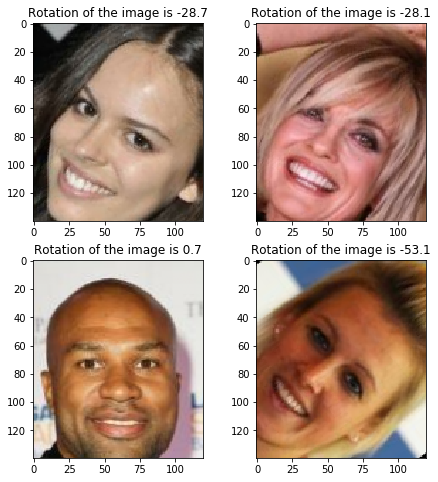

In [74]:
# your code here
plt.figure(figsize = (8, 8))
grid = plt.GridSpec(2, 2, wspace=0, hspace=0.2)
train_look_ds = train_rot_ds.take(4)
idx = 0
for img in train_look_ds.as_numpy_iterator():
    plt.subplot(grid[idx % 2, (int)(idx / 2)])
    plt.imshow(img[0])
    plt.title("Rotation of the image is %.1lf" % img[1])
    idx += 1

**4.3** Conceptual Question. [2pts] Dropout layers have been shown to work well for regularizing deep neural networks, and can be used for very little computational cost. For our network, is it a good idea to use dropout layers? Explain, being sure to explicitly discuss how a dropout layer works, and what that would mean for our model.


Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. [reference](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf) Dropout layer randomly shut down some nodes in every backpropagation. This will breaks up situations where network layers co-adapt to correct mistakes from prior layers, and make the model more robust.

I think it's a good idea to use dropout layers in our model. Our model has 911,745 parameters if dropout isn't used. With too many parameters, the model has a great chance to overfit. Without dropout, the model may use certain features from a certain person to predict the rotation. Using dropout can regularize our model and decrease the risk of overfitting. What's more, using dropout can reduce computational cost with less parameters to train.

**4.4** Compile a Model. [4pts] Construct a model with multiple Conv layers and any other layers you think would help. Be sure to output `<yourmodelname>.summary()` as always. Feel free to experiment with architectures and number of parameters if you wish to get better performance or better training speed. You certainly don't need more than a few million parameters; we were able to it with substantially fewer. Any working setup is acceptable though.


In [11]:
def coarse_accuracy(y_true, y_pred):
    return abs(y_true-y_pred)<=3

In [12]:
# your code here 
def create_mymodel(input_shape=(140,120,3)):
    model = Sequential()
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), name='conv1', activation='relu', input_shape=input_shape))
    #model.add(Conv2D(filters=64, kernel_size=(3, 3), name='conv2', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool1'))
    
    model.add(Conv2D(filters=128, kernel_size=(3, 3), name='conv3', activation='relu'))
    #model.add(Conv2D(filters=128, kernel_size=(3, 3), name='conv4', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool2'))
    
    model.add(Conv2D(filters=256, kernel_size=(3, 3), name='conv5', activation='relu'))
    #model.add(Conv2D(filters=256, kernel_size=(3, 3), name='conv6', activation='relu'))
    #model.add(Conv2D(filters=256, kernel_size=(1, 1), name='conv7', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool3'))
    
    model.add(Conv2D(filters=128, kernel_size=(3, 3), name='conv8', activation='relu'))
    #model.add(Conv2D(filters=512, kernel_size=(3, 3), name='conv9', activation='relu'))
    #model.add(Conv2D(filters=512, kernel_size=(1, 1), name='conv10', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool4'))
    model.add(Dropout(0.5, name='dropout'))
    
    model.add(Flatten(name='flatten'))
    #model.add(Dense(1024, activation='relu'))
    model.add(Dense(64, name='fc1', activation='relu'))
    #model.add(Dense(4096, activation='relu'))
    #model.add(Dense(1200, activation='relu'))
    model.add(Dense(1, name='output', activation='linear'))
    
    optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=2e-07,)
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=[coarse_accuracy])
    return model

In [13]:
mymodel = create_mymodel()
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 138, 118, 64)      1792      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 69, 59, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 67, 57, 128)       73856     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 33, 28, 128)       0         
_________________________________________________________________
conv5 (Conv2D)               (None, 31, 26, 256)       295168    
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 15, 13, 256)       0         
_________________________________________________________________
conv8 (Conv2D)               (None, 13, 11, 128)       2

**4.5** Training the Model. [5pts] Train your model using `<yourmodelname>.fit()`. The syntax is a little different when working with Datasets instead of numpy arrays; take a look at the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation. Be sure to also pass the test data as validation data. When passing `train_rot_ds` to `fit()`, you will find it useful to use pipelines to [batch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) the data. You can also experiment with [prefetching](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) batches/elements from the dataset, which may allow you to speed up iterations by a few percent. Finally, while dry-running and prototyping your model, you may find it useful to [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) a subset of the data to speed up experimentation. Your final model should be trained on all the available training data though. You should achieve a validation loss of less than 9, corresponding to $\pm 3^\circ$ accuracy in predicting the rotations on the test set. This can be achieved in just 2-3 epochs, though you are free to train as long as you want.

In [14]:
def tf_preprocess_image(image, label):
    """The only preprocessing we do is subtracting the mean RGB value, 
    computed on the training set, from each pixel"""
    rgb_mean = [103.939/255, 116.779/255, 123.68/255]
    image = image - rgb_mean
    return image, label

In [52]:
train_rot_ds = train_celeb.map(tf_random_rotate_image)
test_rot_ds = test_celeb.map(tf_random_rotate_image)
train_rot_ds = train_rot_ds.map(tf_preprocess_image)
test_rot_ds = test_rot_ds.map(tf_preprocess_image)
train_rot_ds = train_rot_ds.batch(128)
test_rot_ds = test_rot_ds.batch(128)
train_rot_ds = train_rot_ds.prefetch(10)
test_rot_ds = test_rot_ds.prefetch(10)

In [53]:
# save the pretrained weights in a checkpoint file and load the pretrained weights to 
%time 
checkpoint_path_celeb ='train_celeb/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path_celeb)
# Save Codes
celeb_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path_celeb,
                                                     save_weights_only = True,
                                                     verbose=1)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.4 µs


In [17]:
epochs, verbose = 2, 1
history_celeb = mymodel.fit(train_rot_ds,
                              epochs = epochs,  
                              verbose = verbose,
                              validation_data = test_rot_ds,
                              shuffle = True,
                              callbacks = [celeb_callback])
os.mkdir('model/')
mymodel.save('model/celeb_model.h5')

Epoch 1/2
   1272/Unknown - 8229s 6s/step - loss: 50.6773 - coarse_accuracy: 0.5041
Epoch 00001: saving model to train_celeb/cp.ckpt
1272/1272 [==============================] - 8545s 7s/step - loss: 50.6773 - coarse_accuracy: 0.5041 - val_loss: 16.4534 - val_coarse_accuracy: 0.6639
Epoch 2/2
1271/1272 [============================>.] - ETA: 6s - loss: 16.7712 - coarse_accuracy: 0.6615 
Epoch 00002: saving model to train_celeb/cp.ckpt
1272/1272 [==============================] - 8570s 7s/step - loss: 16.7678 - coarse_accuracy: 0.6616 - val_loss: 8.0303 - val_coarse_accuracy: 0.8443


**4.6** Conceptual Question.[2pt] Suppose you save just the weights after training for a while. If you were to load the weights again and continue training, would it work? How will it be different than continuing from a full-model save? Answer in a few sentences.


It will work if we train a proportion of data, shut down and re-load the weights again and continue training. Because we use `shuffle=True`, everytime we will train different data. But it's better to save the full-model training with all data. Because the former training will lead to repeated fed images, which is equivalent to assign higher weight to some randomly drawn images. And certainly, this is unreasonable.

**4.7** Save and load your weights. [1pt] Save your model weights to the path 'model/*somename*' where *somename* is whatever filename prefix you want. Then load weights from the same path.

Note: If you don't intend to use it, you may leave your line of code commented out. Nothing should change if you run it after saving it though, since it will load the same weights and everything else about the model will still be in memory. If you close your notebook or restart your kernel in the future, run all the cells required to compile the model, but skip the cells that performs the fit and the save. After running the load weights cell, your previously trained model will be restored.

In [54]:
# your code here
mymodel.save('model/celeb_model.h5')
mymodel.load_weights('model/celeb_model.h5')

**4.8** Checking out performance on the Test Set.[5pts] Create a subplots grid with 4 rows and 3 columns. Each row will be a separate image from the test set (of your choice) and each column will consist of: Original Image, Predicted Straightened Image, Target Straightened Image. The title of the latter two should be the predicted rotation and the actual rotation. For example, a row should look something like this:
![straightened face](data/straightened.png)
This can be achieved using the provided function `rot_resize` to correct for the rotation predicted by your network.


In [55]:
def tf_process_image(image, label):
    rgb_mean = [103.939/255, 116.779/255, 123.68/255]
    image = image + rgb_mean
    return image, label    

In [56]:
test_rot_ds = test_rot_ds.unbatch()
test_data = test_rot_ds.take(4)
test_data = test_data.map(tf_process_image)
images = list()
labels = list()
for img in test_data.as_numpy_iterator():
    images.append(img[0])
    labels.append(img[1])
images_array = np.array(images)
results = mymodel.predict(images_array, batch_size=1)

true_images = list()
pred_images = list()
for i in range(4):
    true_images.append(rot_resize(images[i], -labels[i]))
    pred_images.append(rot_resize(images[i], -results[i][0]))

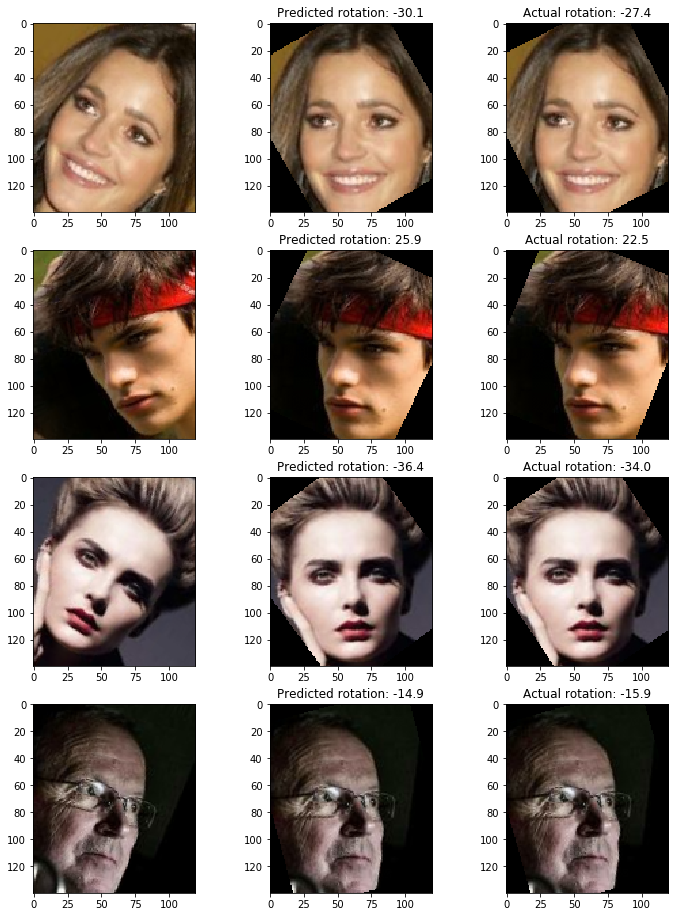

In [57]:
plt.figure(figsize = (12, 16))
grid = plt.GridSpec(4, 3, wspace=0.2, hspace=0.2)
idx = 0
for i in range(4):
    plt.subplot(grid[i, 0])
    plt.imshow(images[i])
    plt.subplot(grid[i, 1])
    plt.imshow(pred_images[i])
    plt.title("Predicted rotation: %.1lf" % results[i])
    plt.subplot(grid[i, 2])
    plt.imshow(true_images[i])
    plt.title("Actual rotation: %.1lf" % labels[i])

**4.9** Visualizing Attention. [5pts] Like in question 3, we will use the saliency map and GradCAM to see what the network was looking at to determine the orientation of a testset image. The code will be very similar to what you used in question 3, but there are two important modifications. In defining the new `model_modifier(m)` function, simply replace the contents with `pass`. This is because your model does not (should not) have a softmax activation on the last layer, so we don't need this function to do anything. The other modification is to change the loss function (that was defined as a Python lambda function) to an MSE, so it should now be `tf.keras.backend.mean((output - label)**2)` where label is the actual rotation of the image. Pick any image from the test set, and like before, make a row of 3 subplots showing the original image, the saliency map, and the GradCAM output. __Question: What types of features does the network appear to use to determine orientation?__


In [150]:
# your code here 
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

    
# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    pass

# Create Saliency object
def focus_plot(img, model, true_label, predicted_label , colormap =cm.Reds, smoothness= 20):
    saliency = Saliency(model, model_modifier)

    # Define loss function. 6 is the index corresponding to ouzel.
    loss = lambda output: K.mean((output - predicted_label)**2)

    # Generate saliency map
    saliency_map = saliency(loss, img, smooth_samples=smoothness)
    saliency_map = normalize(saliency_map)
    
    # Create Gradcam object
    gradcam = Gradcam(model, model_modifier)

    # Generate heatmap with GradCAM
    cam = gradcam(loss, img)
    cam = normalize(cam)
    
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
    ax[0].imshow(img)
    ax[0].set_title("Original Picture")
    f.suptitle("Actual rotation: {0}, Predicted rotation: {1}".format(true_label, predicted_label))
    ax[1].imshow(saliency_map[0], cmap='gray')
    ax[1].set_title("SmoothGrad")
    heatmap = np.uint8(colormap(cam[0])[..., :3] * 255)
    ax[2].imshow(img,alpha=1)
    ax[2].imshow(heatmap, cmap='gray', alpha=0.8)
    ax[2].set_title("GradCAM")

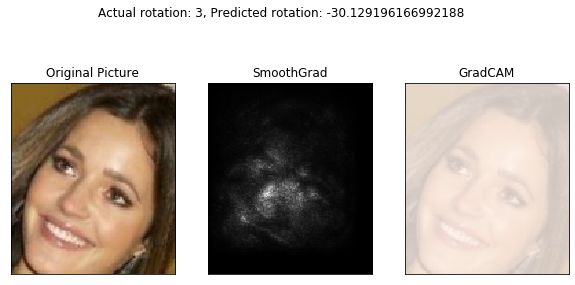

In [151]:
result = mymodel.predict(images[0].reshape((1,140,120,3)))
focus_plot(images[0], mymodel, labels[0], result[0][0], colormap = cm.Reds)

From the SmoothGrad figure, we can see that the network uses nose, mouth and eyes to determine orientation. Especially, nose helps the network a lot, which makes sense, because human nose is always vertical when a face is upright.

**4.10** Correct an image of your choosing. [1pt] Find an image or image(s) (not from the provided test/training sets), or make your own. You may rotate it yourself up to $\pm60^\circ$, or the face can already be naturally rotated. Resize and crop the image to 140px by 120px, load it here, and normalize it to [0.,1.] (you may use the provided `normalize_image` function) and use your network to correct it. I found that my network was a very effective "un-confuser":
![Confused Chris](data/chrisprattcorrection.png)

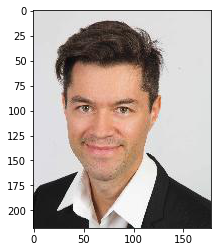

In [61]:
from PIL import Image
face = Image.open('face_image2.jpeg')
face = face.resize((178, 218))
face.save('new_face.jpg')
new_face = plt.imread('new_face.jpg')
plt.imshow(new_face)
face = face.resize((120, 140))
face_tensor = tf.convert_to_tensor(new_face.reshape((1,)+new_face.shape))

In [62]:
face_data = tf.data.Dataset.from_tensor_slices({'image':face_tensor})
face_rot_data = face_data.map(tf_random_rotate_image)
element = list(face_rot_data.take(1))[0]
face_rot_image = np.array(element[0])
face_label = element[1]

Text(0.5, 1.0, 'Actual rotation: 50.2')

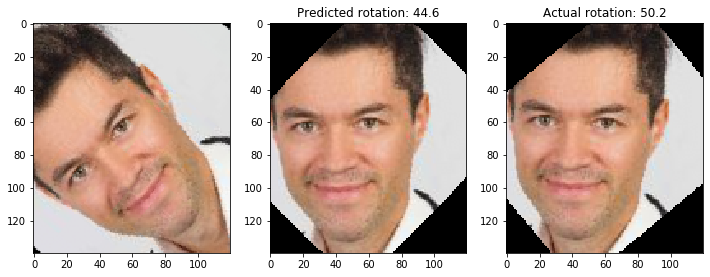

In [66]:
mymodel.load_weights('model/celeb_model.h5')
face_res = mymodel.predict(face_rot_image.reshape((1,140,120,3)))
plt.figure(figsize = (12, 16))
grid = plt.GridSpec(1, 3, wspace=0.2, hspace=0.2)
plt.subplot(grid[0, 0])
plt.imshow(face_rot_image)
face_pred = rot_resize(face_rot_image, -face_res[0][0])
plt.subplot(grid[0, 1])
plt.imshow(face_pred)
plt.title("Predicted rotation: %.1lf" % face_res[0][0])
plt.subplot(grid[0, 2])
face_actual = rot_resize(face_rot_image, -face_label)
plt.imshow(face_actual)
plt.title("Actual rotation: %.1lf" % face_label)